In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd

import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("GAU_TRY Geçmiş Verileri.csv")
data.head()

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Fark %
0,27.09.2019,"272,992","274,703","275,121","270,986","-0,61%"
1,26.09.2019,"274,664","274,873","276,505","273,190","-0,08%"
2,25.09.2019,"274,874","280,543","281,268","273,995","-2,03%"
3,24.09.2019,"280,557","279,625","281,451","277,372","0,33%"
4,23.09.2019,"279,626","279,510","281,343","278,327","0,05%"


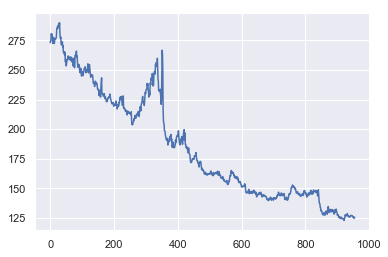

In [3]:
gold = data['Şimdi'].apply(lambda x: float(x.replace(',', '.'))).values
plt.plot(gold)

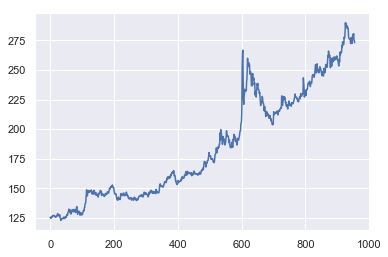

In [4]:
y = gold[::-1]
plt.plot(y)

In [5]:
x = y[0:-1]
y = y[1:]

In [6]:
x.shape

(955,)

In [7]:
y.shape

(955,)

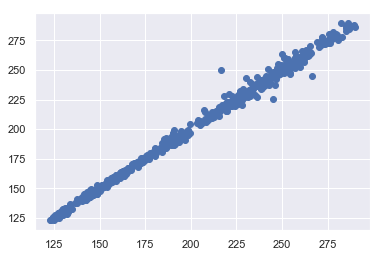

In [8]:
plt.plot(x,y, 'o')

In [9]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = x
y = y

# Split dataset into train ab=nd test sets
X_train, X_test, y_train, y_test = X[:600], X[600:], y[:600], y[600:]

In [10]:
# fit simple linear regression model to the data
lr = LinearRegression()
lr.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
# make predicitions
y_pred = lr.predict(X_test.reshape(-1, 1))

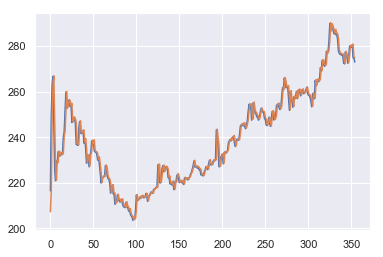

In [11]:
plt.plot(y_test.flatten())
plt.plot(y_pred.flatten())

In [12]:
today = 0
y_predy = [y[today]]           
for i in range(y.shape[0] - today):
    y_predy.append(lr.predict(y_predy[-1].reshape(-1, 1))[0,0])

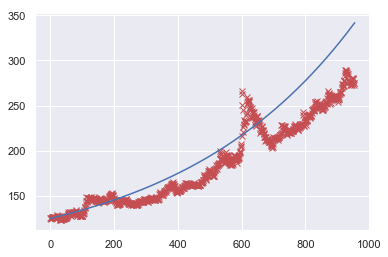

In [13]:
plt.plot(y[today:].flatten(), 'rx')
plt.plot(y_predy)

In [14]:
len(y_predy)

956

In [15]:
lr.coef_, lr.intercept_

(array([[1.0018059]]), array([-0.14081746]))

In [37]:
x[:10]

array([125.66 , 125.047, 124.558, 125.195, 125.702, 125.517, 125.739,
       126.798, 126.857, 127.031])

# Looking k steps back

In [16]:
k = 1

In [17]:
y[:9]

array([125.047, 124.558, 125.195, 125.702, 125.517, 125.739, 126.798,
       126.857, 127.031])

In [18]:
ndays = y.shape[0]
stepsize = k
X =  np.vstack(([y[i : i + stepsize ] for i in range(ndays - stepsize)]))
X[:9]

array([[125.047],
       [124.558],
       [125.195],
       [125.702],
       [125.517],
       [125.739],
       [126.798],
       [126.857],
       [127.031]])

In [19]:
t = y[stepsize:]
t[:9]

array([124.558, 125.195, 125.702, 125.517, 125.739, 126.798, 126.857,
       127.031, 126.786])

In [20]:
ndays, X.shape, t.shape

(955, (954, 1), (954,))

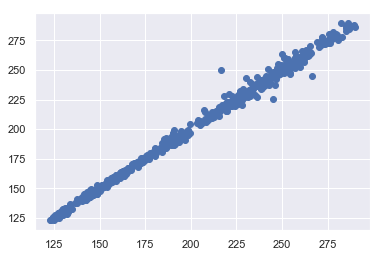

In [21]:
plt.plot(X.mean(axis = 1), t, 'o')

In [22]:
# Split dataset into train ab=nd test sets
training_days = 600
X_train, X_test, y_train, y_test = X[:training_days], X[training_days:], t[:training_days], t[training_days:]

In [23]:
# fit simple linear regression model to the data
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
# make predicitions
y_pred = lr.predict(X_test)

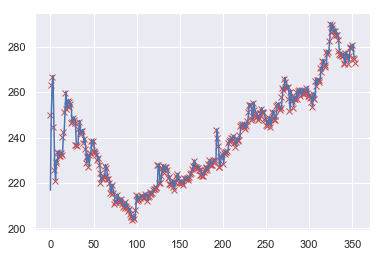

In [25]:
plt.plot(y_test.flatten(), 'rx')
plt.plot(y_pred)

# Predict

In [26]:
lastK = X_test[0]
lastK

array([216.471])

In [27]:
y_pred = lr.predict(lastK.reshape(1, -1))
y_pred

array([216.86837838])

In [28]:
def blindPredict(lastK):
    y_pred = lr.predict(lastK.reshape(1, -1))[0]
    return y_pred, np.array(list(lastK[1:]) + [y_pred])

In [29]:
lastK

array([216.471])

In [30]:
y_pred, lastK = blindPredict(lastK)
y_pred, lastK

(216.86837837579543, array([216.86837838]))

In [31]:
y_pred, lastK = blindPredict(lastK)
y_pred, lastK

(217.2672976653949, array([217.26729767]))

In [32]:
s = 0
lastK = X[s]
preds = []
for i in range(s, ndays):
    y_pred, lastK = blindPredict(lastK)
    preds.append(y_pred)

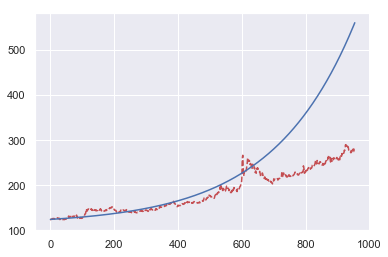

In [33]:
plt.plot(X[s:], 'r--')
plt.plot(preds)

In [34]:
len(preds)

955

In [35]:
lr.coef_, lr.intercept_

(array([1.0038777]), -0.4420310445217126)